In [1]:
from gamestate import GameState
from strategy import Strategy
from player import Player
from game_output import game_output
from game import Game
import random     
import matplotlib.pyplot as plt
import math 
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env  import DummyVecEnv
import numpy as np

## Strategies
####   rm opmm  oprm  bm   sm   res   respen  jep av

In [2]:
tight_strategy =  Strategy( 0,  1,  2,   10,   5,  500,  1000,   10000) #TIGHT BOUNDARY 
greedy_strategy =  Strategy( 3, 0,  2,   50,  50,    0,  1200,   20000) #GREEDY BOUNDARY
irrational_strategy =  Strategy( 0,   0,   0,    0,   0,   0,     0 ,   0    ) #IRRATIONAL BOUNDARY  
random_strategy1 =  Strategy( 3,  0,  3,     10,  10,  100,   500,   10000) #RANDOM TESTER 1
random_strategy2 =  Strategy( 2,  2,  3,   15,  15,  300,   500,   10000) #RANDOM TESTER 2
random_strategy3 =  Strategy( 9,  0,    1,   20,  20,   0 ,   900,   20000) #RANDOM TESTER 3
good_strategy =  Strategy( 3,  0,    0,   25, 25,   0 ,   1000,   20000) #good TESTER 4
optimal_strategy =  Strategy( 3,  0,    1,   10,  10,   0 ,   900,   20000) #OPTIMAL STRATEGY

tightPlayer = Player("Tight",  tight_strategy )
irrationalPlayer   = Player("Irrational",   irrational_strategy )
greedyPlayer   = Player("Greedy",   greedy_strategy )
newbiePlayer1 = Player("Newbie1",   random_strategy1 )
newbiePlayer2 = Player("Newbie2",   random_strategy2 )
newbiePlayer3 = Player("Newbie3",   random_strategy3 )
goodPlayer = Player("Good",   good_strategy )
optimalPlayer = Player("Optimal",   optimal_strategy )
#AI = Player("RL_Player",   random_strategy3)
#print(AI.strategy.strategy_factors())   

In [5]:
def test_game(test_players , num_games, start_money, game_length):
    games_played = 0
    for player in test_players:
        player.games_won = 0 
        player.games_lost = 0
        
    while games_played < num_games:
        random.shuffle(test_players)
        game = Game( test_players, start_money, game_length )
        for player in test_players:
            player.total_games_played += 1
        (winners,losers) = game.play("no display")
        if len(winners) == 1: ## if there is a unique winner
            winners[0].games_won += 1
            winners[0].total_games_won += 1
            games_played += 1
        if len(losers) == 1: ## if there is a unique winner
            losers[0].games_lost += 1
    most_won = max([player.games_won for player in test_players])
    return [player for player in test_players if player.games_won == most_won]

In [4]:
def plot_func(winning_players):
    fig, ax = plt.subplots()
    ax.plot(winning_players.keys(), winning_players.values())
    ax.set_title("players against each other")
    #ax.set_xlabel("X-axis")
    ax.set_ylabel("% of wins")
    plt.show()

In [6]:
def plot_bar(players):
    #fig = plt.figure(figsize = (10, 5))
    #f = plt.figure() 
    #f.set_figwidth(4) 
    plt.figure(figsize=(10, 6))
    plt.bar(list(players.keys()), list(players.values()))
    plt.title("players against each other")
    #ax.set_xlabel("X-axis")
    plt.ylabel("% of wins")
    plt.show()

In [7]:
num_games = 5
start_money = 500
game_length = 14
test_times = 5

In [6]:
#testing cell

c = [4 , 77]
b = {'a' : 55 , 'c' : 90}
def aa(a,b):
    x = math.ceil(a)
    return x
#aa(*a)
t = 4.44444
diccc = {}
diccc[0]={1 : 0.4 , 4 : 0.3}

print(max(list(diccc[0].values())))
Keymax = max(diccc[0], key= lambda x: diccc[0][x])

print(Keymax)


0.4
1


In [7]:
def collaborative_func(players):
      
    first_phase = {}
    second_phase = [0,0,0,0,0,0,0,0]
    final_phase = []    

    for player in players:
        #won = player.total_games_won/player.total_games_played
        won = player.test_won
        #max_win = player.max_win_rate
        player_strategy_factors = player.strategy.strategy_factors()
        first_phase[player.name] = [won  * factor for factor in player_strategy_factors]
        
    
    for i in range(8): 
        for player in first_phase:
            currentPlayer = first_phase[player]
            second_phase[i] +=currentPlayer[i]
        final_phase.append(math.floor(second_phase[i] / test_times))
        #final_phase.append(math.ceil(second_phase[i]))
    

    return final_phase

In [8]:
def min_regret_func(players, best_player):
      
    first_phase = {}   
    min_regret = 100000
    min_regret_player = players[0]

    for player in players:
        first_phase[player] = sum(player.strategy.strategy_factors())

    best_strategy_sum = sum(best_player.strategy.strategy_factors())

    for player in first_phase:
        if abs(best_strategy_sum - first_phase[player]) < min_regret:
            min_regret = abs(best_strategy_sum - first_phase[player]) 
            min_regret_player = player.strategy.strategy_factors()

    
    return min_regret_player

In [10]:
def min_modified_regret_func(players):
    
    first_phase = {0:{} ,1:{},2:{},3:{},4:{},5:{},6:{},7:{} }
    second_phase = []
    
    for player in players:
        if player.total_games_played > 0:
            rate = player.total_games_won / player.total_games_played
            player_strategy_factors = player.strategy.strategy_factors()
            for i in range(8):
                if player_strategy_factors[i] in first_phase[i]:
                    first_phase[i][player_strategy_factors[i]] += rate
                else:
                    first_phase[i][player_strategy_factors[i]] = rate

    for factor_index in first_phase:
        Keymax = max(first_phase[factor_index], key= lambda x: first_phase[factor_index][x])
        second_phase.append(Keymax) 
                           
    return second_phase

In [8]:
def define_players():
    players = [tightPlayer, irrationalPlayer , greedyPlayer , newbiePlayer1 , newbiePlayer2
           ,newbiePlayer3 , optimalPlayer , goodPlayer]
    return players


In [9]:
def get_best_player(best_players):
    if len(best_players) == 1:
        best_player = best_players[0]
    else:
        least_lost = min([player.games_lost for player in best_players])
        best_player = [player for player in best_players if player.games_lost == least_lost]
        best_player = best_player[0]
    return best_player

Test 0 win rate: {'Irrational': 50.0, 'Good': 30.0, 'Optimal': 20.0} and best player: Irrational
Test 1 win rate: {'Newbie2': 30.0, 'Newbie1': 60.0, 'Tight': 10.0} and best player: Newbie1
Test 2 win rate: {'Newbie3': 20.0, 'Optimal': 50.0, 'Greedy': 30.0} and best player: Optimal
Test 3 win rate: {'Tight': 0.0, 'Greedy': 100.0, 'Irrational': 0.0} and best player: Greedy
Test 4 win rate: {'Newbie3': 20.0, 'Irrational': 20.0, 'Optimal': 60.0} and best player: Optimal
Test 5 win rate: {'Irrational': 0.0, 'Tight': 0.0, 'Newbie2': 100.0} and best player: Newbie2
Test 6 win rate: {'Optimal': 40.0, 'Irrational': 0.0, 'Newbie2': 60.0} and best player: Newbie2
Test 7 win rate: {'Irrational': 0.0, 'Optimal': 100.0, 'Tight': 0.0} and best player: Optimal
Test 8 win rate: {'Irrational': 20.0, 'Newbie3': 10.0, 'Greedy': 70.0} and best player: Greedy
Test 9 win rate: {'Newbie3': 30.0, 'Optimal': 30.0, 'Good': 40.0} and best player: Good
Test 10 win rate: {'Irrational': 0.0, 'Newbie3': 80.0, 'Newbie

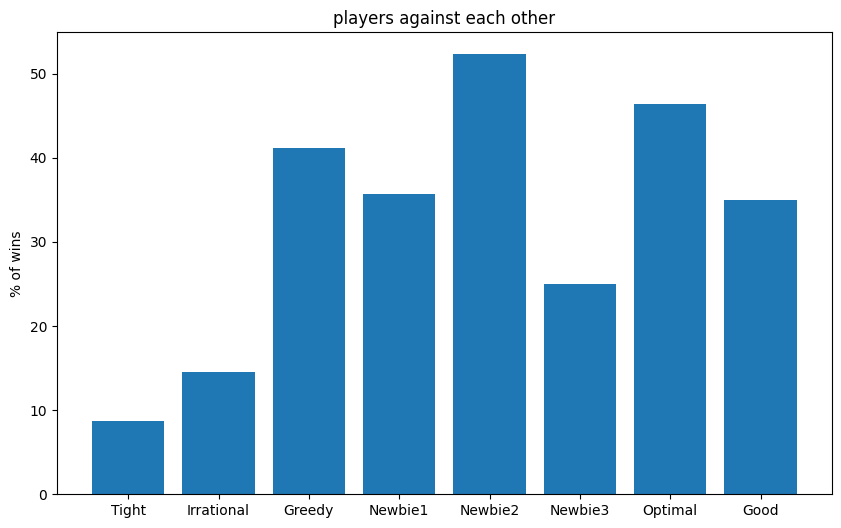

players win rate in all tests


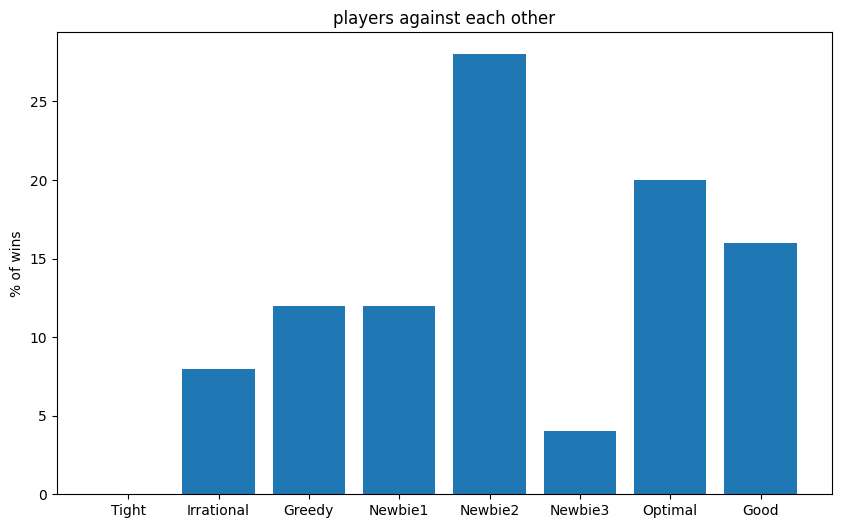

collaborative_func strategy [2, 0, 1, 18, 18, 96, 720, 14400]
min_regret_func strategy [2, 2, 3, 15, 15, 300, 500, 10000]
min_modified_regret_func strategy [3, 0, 3, 10, 10, 0, 500, 20000]
Number of tests: 25 number of games inside a test: 10


In [13]:
players = define_players()
for i in range(test_times):
    test_players = random.sample(players , 3)
    best_players = test_game(test_players , num_games , start_money , game_length)
    best_player = get_best_player(best_players)
    
    best_player.set_max_win_rate(best_player.games_won/num_games)
    best_player.add_win_rate(best_player.games_won/num_games)
    best_player.test_won +=1
    players_percent = {}
    for player in test_players:
        players_percent[player.name] = (100 * player.games_won)/num_games
    
    print("Test" , i , "win rate:" ,players_percent , "and best player:" ,best_player )
    #print("Best player: [" , best_player ,"] with policy:" ,best_player.strategy.strategy_factors() , "and win rate",(100 * best_player.games_won)/num_games ,'%')
    #print("\n")
    #plot_bar(players_percent)

player_total_won = {}
player_test_won = {}
best_player_name = players[0].name
for player in players:
    if player.total_games_played > 0:
        player_total_won[player.name] = (player.total_games_won * 100)/(player.total_games_played)
    player_test_won[player.name] = (player.test_won * 100)/( test_times)

    if(player_total_won[player.name] > player_total_won[best_player_name]):
        best_player_name = player.name

best_player = [player for player in players if player.name == best_player_name]
print("players win rate in all games")
plot_bar(player_total_won)
print("players win rate in all tests")
plot_bar(player_test_won)

best_policy = collaborative_func(players)
best_policy2 = min_regret_func(players, best_player[0])
best_policy3 = min_modified_regret_func(players)

print("collaborative_func strategy", best_policy )
print("min_regret_func strategy", best_policy2 )
print("min_modified_regret_func strategy", best_policy3 )


print("Number of tests:" ,test_times , "number of games inside a test:" ,num_games )

In [10]:
def reset_players_tests(players):
    for player in players:
        player.total_games_won = 0
        player.total_games_played = 0
        player.test_won = 0

In [11]:
# Define a custom environment
class CustomEnvironment(gym.Env):
    def __init__(self):
        super(CustomEnvironment, self).__init__()
        self.num_elements = 8
        self.best_list = [ 3,  0,  3,     10,  10,  100,   500,   10000 ] # Initialize with random values
        self.observation_space = gym.spaces.Box(low=0, high=25000, shape=(self.num_elements,))
        self.action_space = gym.spaces.Box(low=0, high=25000, shape=(self.num_elements,))

    def step(self, action):
        # Simulate the game
        # In a real application, replace this with your game logic and calculate the winning rate

        RL_strategy =  Strategy(*self.best_list) 
        RL_Player = Player("RL_Player",   RL_strategy )
        players = define_players()
        test_players = []
        reset_players_tests(players)
        for i in range(test_times):
            test_players = random.sample(players , 2)
            test_players.append(RL_Player)

            best_players = test_game(test_players , num_games , start_money , game_length)
            best_player = get_best_player(best_players)
        
            best_player.test_won +=1

            players_percent = {}
            for player in test_players:
                players_percent[player.name] = (100 * player.games_won)/num_games
                
            print("Test" , i , "win rate:" ,players_percent , "and best player:" ,best_player )

        RL_Player_with_win_rate = [player for player in test_players if player.name == "RL_Player"]
        RL_Player_with_win_rate = RL_Player_with_win_rate[0]
        winning_rate = RL_Player_with_win_rate.games_won/num_games
        reward = winning_rate  # Reward is the winning rate
        done = True  # For simplicity, we'll consider a single-step environment
        return self.best_list, reward, done, {}

    def reset(self):
        return self.best_list

In [15]:
#evaluation phase

def evaluate_policy(best_policy, policy_name):
    print("This policy:" , best_policy , "after applying:" ,policy_name)
    RL_strategy =  Strategy(*best_policy) #RANDOM TESTER 2
    RL_Player = Player("RL_Player",   RL_strategy )
    players = define_players()
    reset_players_tests(players)
    for i in range(test_times):
        test_players = random.sample(players , 2)
        test_players.append(RL_Player)

        best_players = test_game(test_players , num_games , start_money , game_length)
        best_player = get_best_player(best_players)
        
        best_player.test_won +=1

        players_percent = {}
        for player in test_players:
            players_percent[player.name] = (100 * player.games_won)/num_games
        #print(test_players)
        print("Test" , i , "win rate:" ,players_percent , "and best player:" ,best_player )
        #print("Best player: [" , best_player , "] with policy:" , best_player.strategy.strategy_factors() 
        #      ,"and win rate:", (best_player.games_won * 100)/num_games)
        

    players.append(RL_Player)
    player_total_won = {}
    player_test_won = {}
    for player in players:
        player_test_won[player.name] = (player.test_won * 100)/( test_times)
        if player.total_games_played > 0:
            player_total_won[player.name] = (player.total_games_won * 100)/( player.total_games_played)

    print("RL player win rate in all games:",  player_total_won["RL_Player"] , "%")

    plot_bar(player_total_won)
    
    print("RL player win rate in all test:",  player_test_won["RL_Player"] , "%")
    plot_bar(player_test_won)
    #print(num_games * test_times)

This policy: [2, 0, 1, 18, 18, 96, 720, 14400] after applying: collaborative
Test 0 win rate: {'Tight': 0.0, 'RL_Player': 100.0, 'Irrational': 0.0} and best player: RL_Player
Test 1 win rate: {'Newbie2': 30.0, 'Irrational': 0.0, 'RL_Player': 70.0} and best player: RL_Player
Test 2 win rate: {'Newbie2': 50.0, 'RL_Player': 30.0, 'Greedy': 20.0} and best player: Newbie2
Test 3 win rate: {'Newbie3': 30.0, 'Good': 40.0, 'RL_Player': 30.0} and best player: Good
Test 4 win rate: {'Optimal': 30.0, 'Newbie1': 20.0, 'RL_Player': 50.0} and best player: RL_Player
Test 5 win rate: {'RL_Player': 60.0, 'Greedy': 20.0, 'Newbie1': 20.0} and best player: RL_Player
Test 6 win rate: {'Newbie2': 50.0, 'Optimal': 20.0, 'RL_Player': 30.0} and best player: Newbie2
Test 7 win rate: {'RL_Player': 50.0, 'Newbie1': 10.0, 'Tight': 40.0} and best player: RL_Player
Test 8 win rate: {'RL_Player': 70.0, 'Greedy': 20.0, 'Good': 10.0} and best player: RL_Player
Test 9 win rate: {'Greedy': 20.0, 'Newbie1': 20.0, 'RL_Play

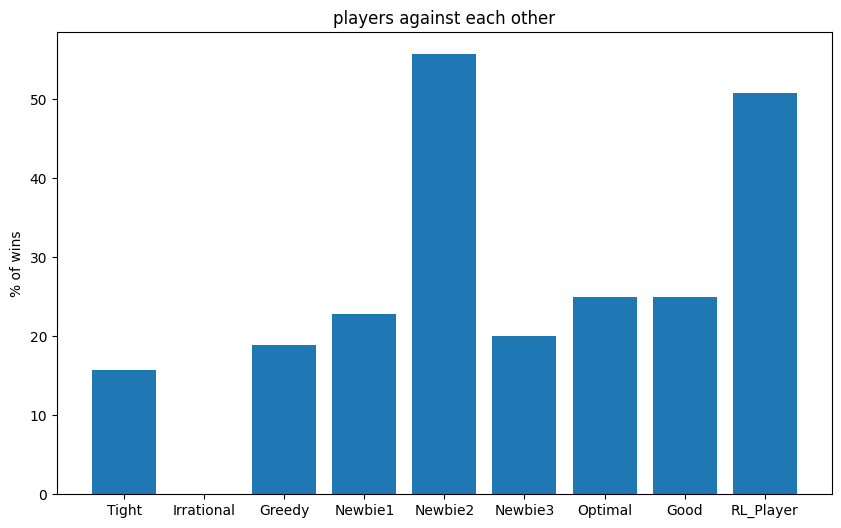

RL player win rate in all test: 60.0 %


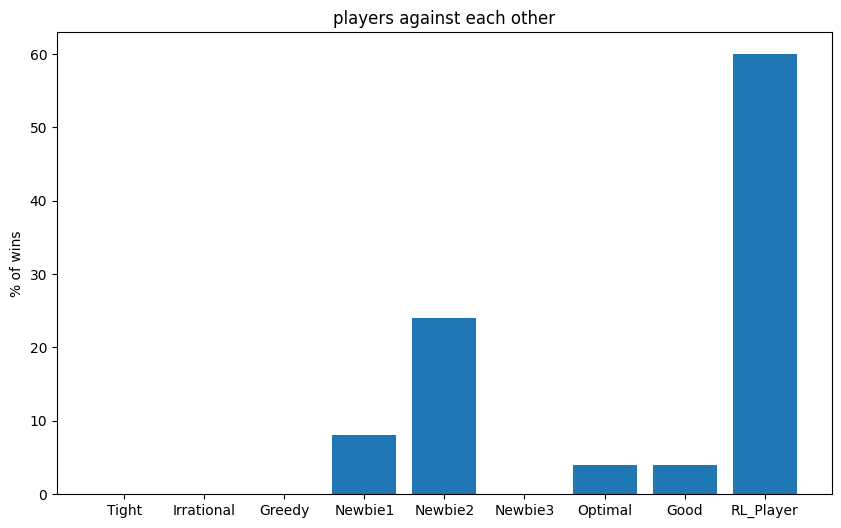

This policy: [2, 2, 3, 15, 15, 300, 500, 10000] after applying: min_regret
Test 0 win rate: {'RL_Player': 40.0, 'Optimal': 40.0, 'Greedy': 20.0} and best player: RL_Player
Test 1 win rate: {'RL_Player': 50.0, 'Newbie3': 20.0, 'Optimal': 30.0} and best player: RL_Player
Test 2 win rate: {'RL_Player': 40.0, 'Tight': 0.0, 'Newbie2': 60.0} and best player: Newbie2
Test 3 win rate: {'Good': 10.0, 'RL_Player': 40.0, 'Greedy': 50.0} and best player: Greedy
Test 4 win rate: {'Newbie1': 60.0, 'RL_Player': 20.0, 'Newbie2': 20.0} and best player: Newbie1
Test 5 win rate: {'Good': 30.0, 'Greedy': 10.0, 'RL_Player': 60.0} and best player: RL_Player
Test 6 win rate: {'Good': 70.0, 'RL_Player': 20.0, 'Irrational': 10.0} and best player: Good
Test 7 win rate: {'Greedy': 20.0, 'Good': 20.0, 'RL_Player': 60.0} and best player: RL_Player
Test 8 win rate: {'RL_Player': 60.0, 'Irrational': 0.0, 'Newbie2': 40.0} and best player: RL_Player
Test 9 win rate: {'Newbie3': 20.0, 'Good': 60.0, 'RL_Player': 20.0} a

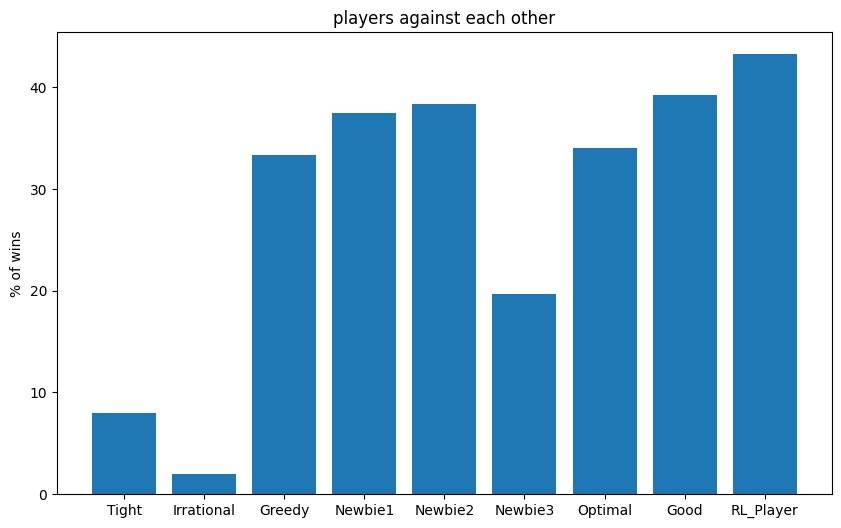

RL player win rate in all test: 52.0 %


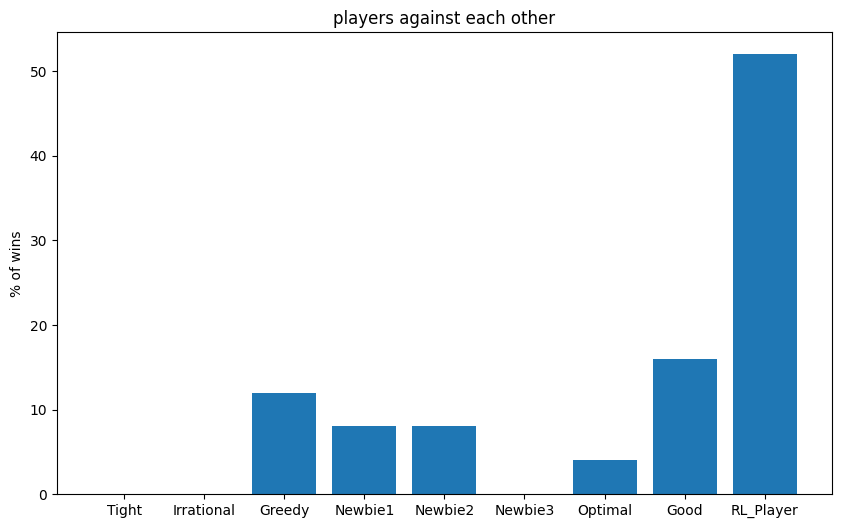

This policy: [3, 0, 3, 10, 10, 0, 500, 20000] after applying: min_modified_regret
Test 0 win rate: {'RL_Player': 0.0, 'Optimal': 60.0, 'Greedy': 40.0} and best player: Optimal
Test 1 win rate: {'Greedy': 30.0, 'RL_Player': 30.0, 'Irrational': 40.0} and best player: Irrational
Test 2 win rate: {'RL_Player': 20.0, 'Greedy': 40.0, 'Tight': 40.0} and best player: Greedy
Test 3 win rate: {'RL_Player': 0.0, 'Newbie1': 50.0, 'Tight': 50.0} and best player: Newbie1
Test 4 win rate: {'RL_Player': 60.0, 'Newbie2': 40.0, 'Irrational': 0.0} and best player: RL_Player
Test 5 win rate: {'Newbie1': 30.0, 'RL_Player': 30.0, 'Tight': 40.0} and best player: Tight
Test 6 win rate: {'RL_Player': 30.0, 'Newbie1': 50.0, 'Newbie3': 20.0} and best player: Newbie1
Test 7 win rate: {'Newbie2': 30.0, 'RL_Player': 60.0, 'Irrational': 10.0} and best player: RL_Player
Test 8 win rate: {'RL_Player': 10.0, 'Good': 60.0, 'Optimal': 30.0} and best player: Good
Test 9 win rate: {'Newbie3': 20.0, 'RL_Player': 70.0, 'Irra

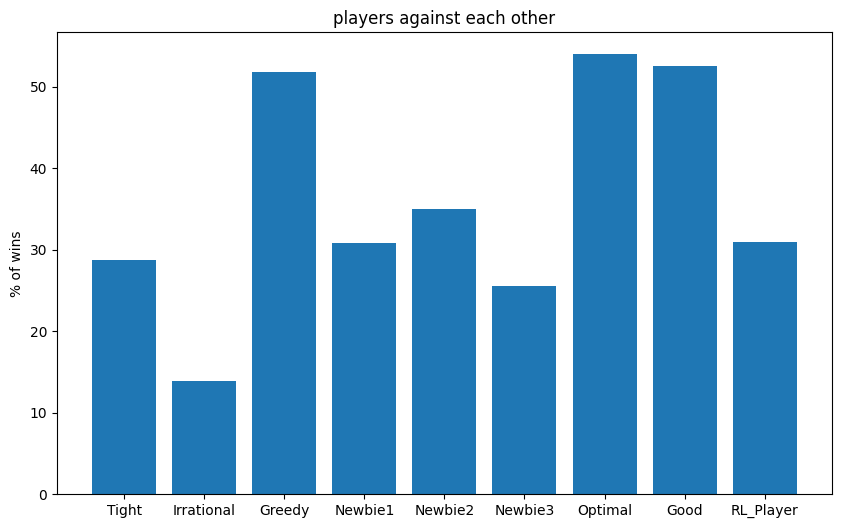

RL player win rate in all test: 24.0 %


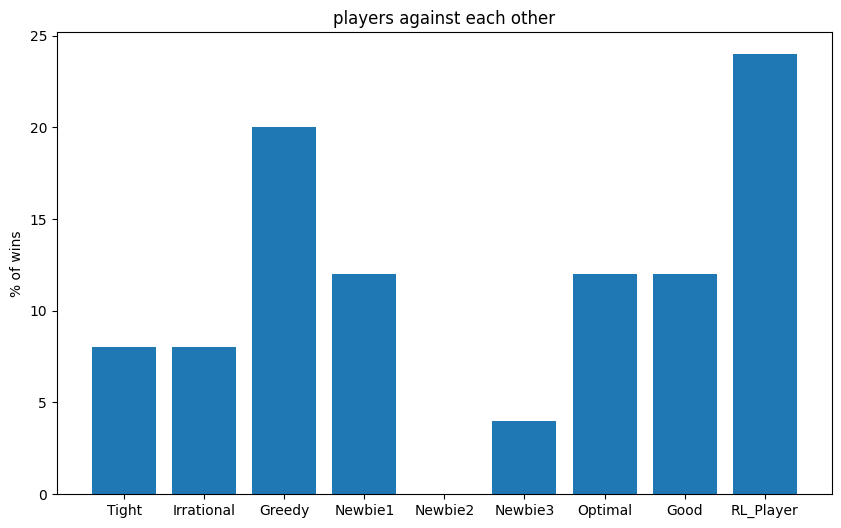

Number of tests: 25 number of games inside a test: 10


In [16]:
evaluate_policy(best_policy , "collaborative")
evaluate_policy(best_policy2 , "min_regret")
evaluate_policy(best_policy3 , "min_modified_regret")

print("Number of tests:" ,test_times , "number of games inside a test:" ,num_games )

In [12]:
# Create a DummyVecEnv
env = DummyVecEnv([lambda: CustomEnvironment()])

# Define the PPO agent
model = PPO("MlpPolicy", env, verbose=1)

# Train the agent to find the best combination of elements
model.learn(total_timesteps=5)

# Extract the learned policy
best_policy = model.predict(env.observation_space.sample())

print("Best Combination of Elements (Policy):", best_policy)

c:\Users\rami.alkhateeb\AppData\Local\Programs\Python\Python39\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Test 0 win rate: {'Irrational': 20.0, 'RL_Player': 20.0, 'Optimal': 60.0} and best player: Optimal
Test 1 win rate: {'Newbie1': 20.0, 'RL_Player': 20.0, 'Greedy': 60.0} and best player: Greedy
Test 2 win rate: {'Good': 40.0, 'RL_Player': 40.0, 'Newbie1': 20.0} and best player: Good
Test 3 win rate: {'Newbie2': 60.0, 'RL_Player': 0.0, 'Optimal': 40.0} and best player: Newbie2
Test 4 win rate: {'Greedy': 40.0, 'Optimal': 60.0, 'RL_Player': 0.0} and best player: Optimal
Test 0 win rate: {'Tight': 0.0, 'Newbie2': 20.0, 'RL_Player': 80.0} and best player: RL_Player
Test 1 win rate: {'Good': 80.0, 'Irrational': 0.0, 'RL_Player': 20.0} and best player: Good
Test 2 win rate: {'Optimal': 60.0, 'RL_Player': 20.0, 'Good': 20.0} and best player: Optimal
Test 3 win rate: {'Optimal': 60.0, 'RL_Player': 20.0, 'Greedy': 20.0} and best player: Optimal
Test 4 win rate: {'RL_Player': 40.0, 'Good': 60.0, 'Irrational': 0.0} and best player: Good
Test 0 win rate: {'RL_Player': 100.0, 'Tight

KeyboardInterrupt: 